**Owner: N4Z3N**


In [ ]:
# Importing necessary libraries
%tensorflow_version 2.x
import keras
from keras.models import Sequential
from keras.layers import Dense   #dense is a linear fn
import pandas as pd
import numpy as np
import pandas.util.testing as tm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm 
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore' ,category=DeprecationWarning)

TensorFlow 1.x selected.


Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [ ]:
from google.colab import drive
drive.mount('odl_dataset')

Mounted at odl_dataset


In [ ]:
#add data to a pandas dataframe
path = '/content/odl_dataset/MyDrive/odl_dataset/winequality-white.csv'
df = pd.read_csv(path, sep=';')  

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(4898, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
corr = df.corr()  #
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
volatile acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07,-0.19
citric acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
residual sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45,-0.10
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36,-0.21
free sulfur dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25,0.01
total sulfur dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45,-0.17
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78,-0.31
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12,0.10
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02,0.05


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

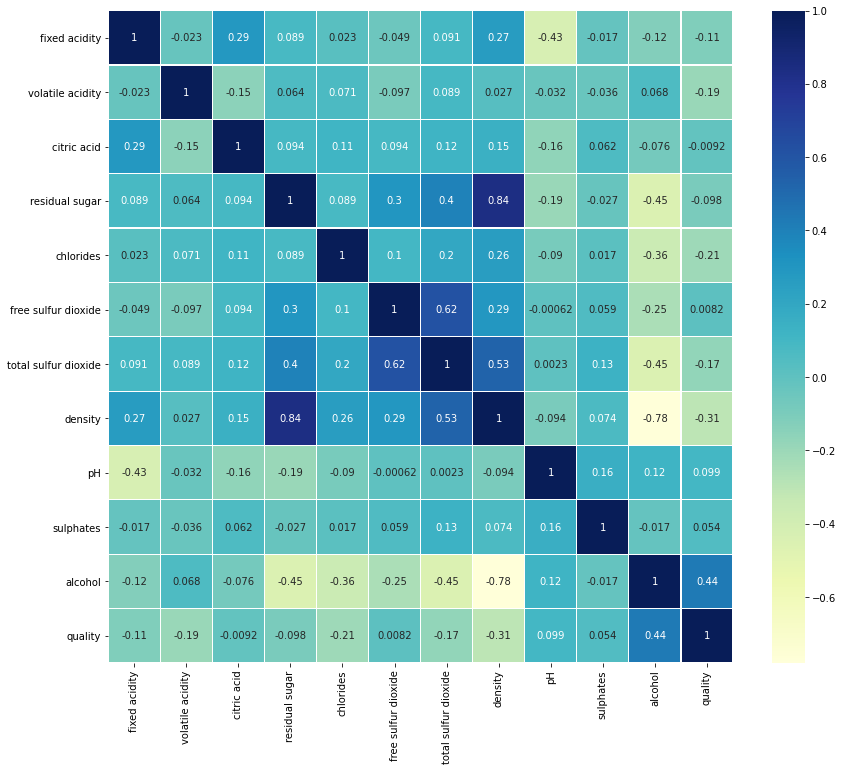

In [ ]:
#heatmap showing correlation between variables in  the dataset
plt.figure(figsize =(14,12))
sns.heatmap(df.corr(), linewidths =.1, cmap ="YlGnBu", annot= True)
plt.yticks(rotation =0)

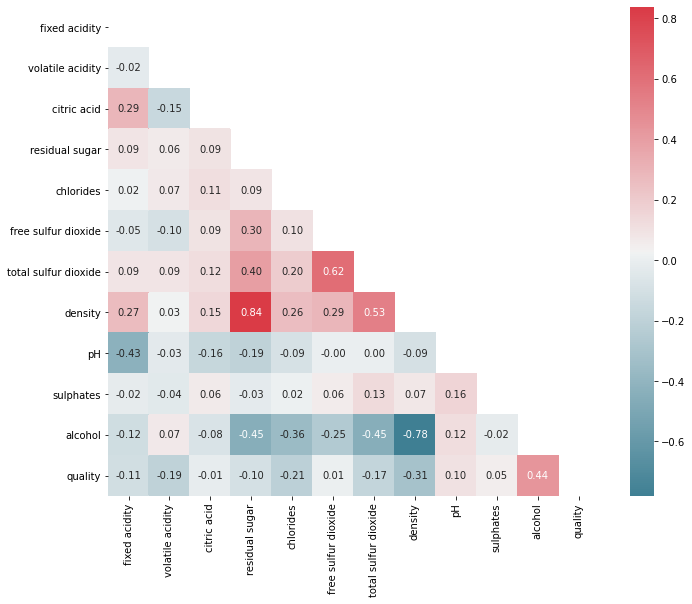

In [ ]:
df_mean = df.copy()
corr_matrix = df_mean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

Wine quality has the highest correlation with alcohol at +0.44. Density, chlorides, volatile acidity and total sulfur dioxide have the highest negative correlation with, -0.31, -0.21, -0.19 and -0.17 repectively. Other relation degrees are very low with each other,such as citric acid,free_sulfur dioxide, sulphates, pH and residual sugar.


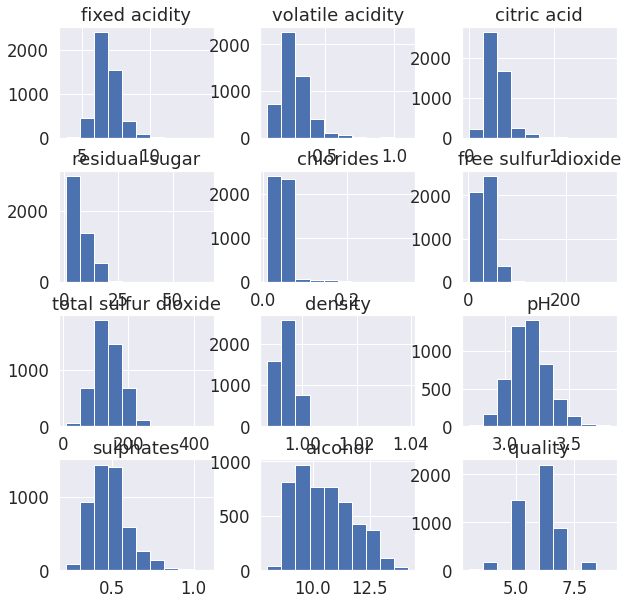

In [ ]:
#histograms for all the attributes
hist = df.hist(bins = 10, figsize=(10,10))

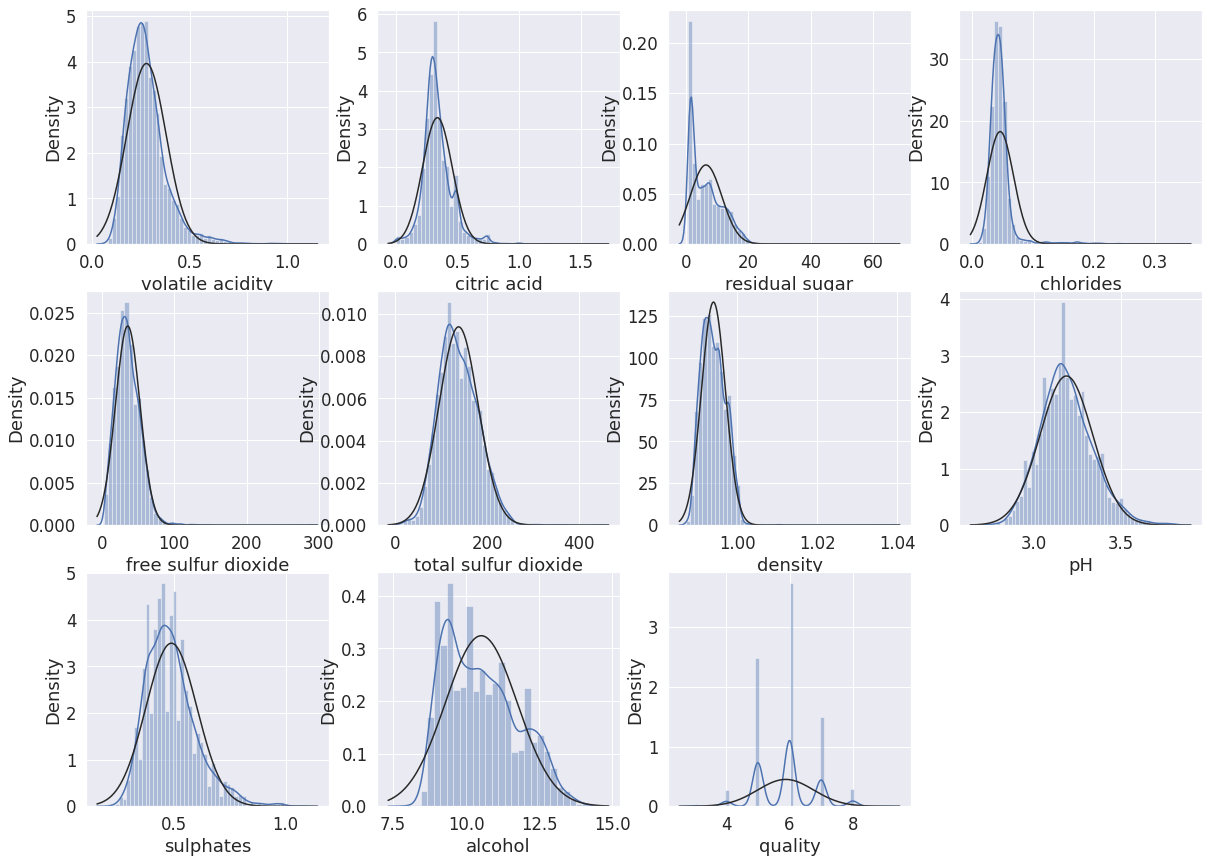

In [ ]:
plt.figure(figsize = (20,25))

for i in range(1,12):
    plt.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit = norm)

In [ ]:
#pairplot shows scatterplots for all the variables in pairs
#sns.pairplot(df)

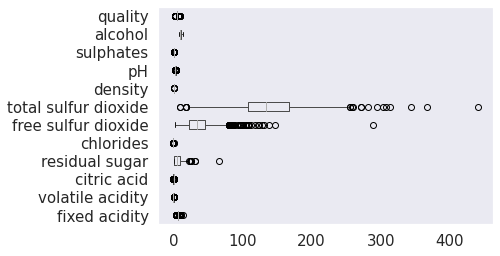

In [ ]:
# boxplot shows distribution and outliers
boxplot = df.boxplot(grid=False, vert=False, fontsize =15)

Since it is a pretty large dataset, we can divide the wine quality into high and low quality i.e, 'good' and 'bad'. 

In [ ]:
#Divide the quality of wine into good and bad wine
#Binary classification
winequality_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = (2, 5.5, 9), labels = winequality_names)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,good


In [ ]:
df.quality.value_counts()

good    3258
bad     1640
Name: quality, dtype: int64

Here, wine in considered as good wine  when its score is higher than 5.5; it is considered as a bad wine when its score is lower than 5.5.

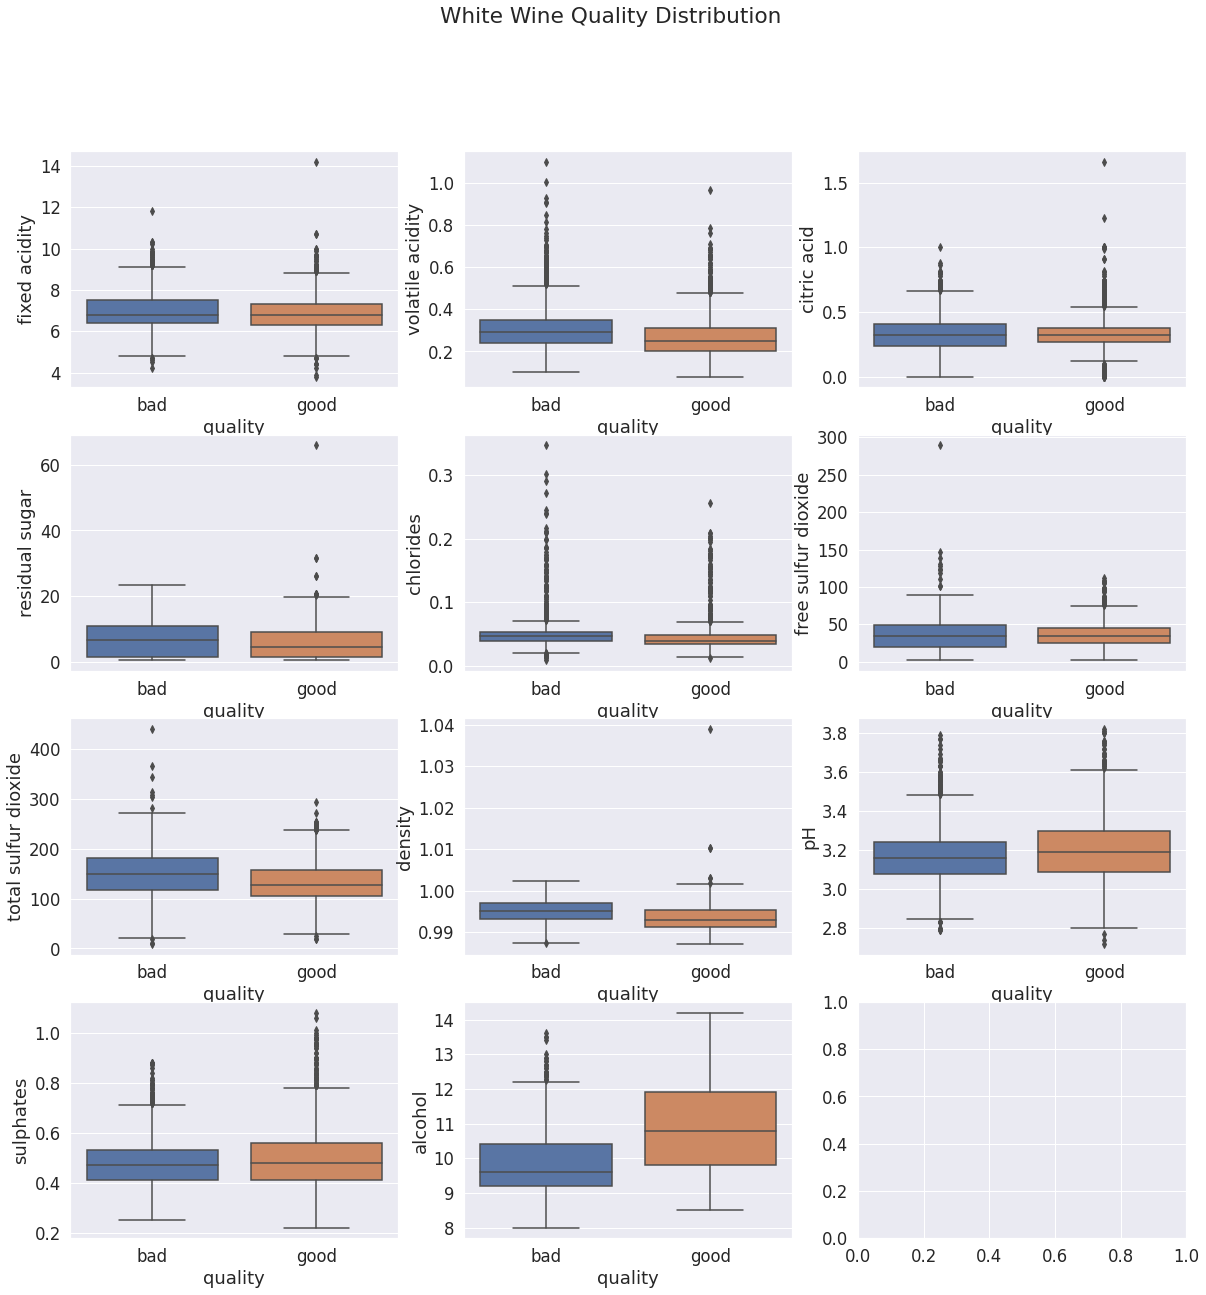

In [ ]:
#Boxplot
fig, axes = plt.subplots(4, 3, figsize=(20,20))

fig.suptitle("White Wine Quality Distribution")
sns.boxplot(ax=axes[0, 0], data=df, x='quality', y='fixed acidity')
sns.boxplot(ax=axes[0, 1], data=df, x='quality', y='volatile acidity')
sns.boxplot(ax=axes[0, 2], data=df, x='quality', y='citric acid')
sns.boxplot(ax=axes[1, 0], data=df, x='quality', y='residual sugar')
sns.boxplot(ax=axes[1, 1], data=df, x='quality', y='chlorides')
sns.boxplot(ax=axes[1, 2], data=df, x='quality', y='free sulfur dioxide')
sns.boxplot(ax=axes[2, 0], data=df, x='quality', y='total sulfur dioxide')
sns.boxplot(ax=axes[2, 1], data=df, x='quality', y='density')
sns.boxplot(ax=axes[2, 2], data=df, x='quality', y='pH')
sns.boxplot(ax=axes[3, 0], data=df, x='quality', y='sulphates')
sns.boxplot(ax=axes[3, 1], data=df, x='quality', y='alcohol')

[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol')]

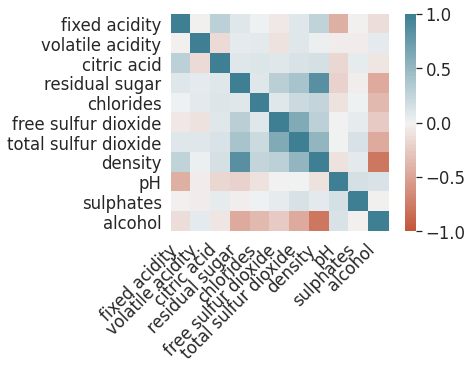

In [ ]:
#Make a correlation diagram
corr = df.corr()

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [ ]:
from sklearn import preprocessing

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#X is features/independent variables(all variables except quality) 
#Y is target/dependent variable(quality is the target variable)
X = df.drop('quality', axis = 1)
Y = df['quality'].values

In [ ]:
#Normalize x values
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

In [ ]:
#split the data in a train and test set (80% train and 20% test )
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state = 40)
print ('The length of the train sets of X and Y is:', X_train.shape,  y_train.shape)
print ('The lenth of the test sets of X and Y is:', X_test.shape,  y_test.shape)

The length of the train sets of X and Y is: (3918, 11) (3918,)
The lenth of the test sets of X and Y is: (980, 11) (980,)


In [ ]:
Y[0:5]

['good', 'good', 'good', 'good', 'good']
Categories (2, object): ['bad' < 'good']

In [ ]:
X[0:5]

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01,
         2.82134917e+00, -3.53550004e-02,  5.69931577e-01,
         7.44565035e-01,  2.33151201e+00, -1.24692128e+00,
        -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02,
        -9.44765273e-01,  1.47747079e-01, -1.25301866e+00,
        -1.49684624e-01, -9.15417164e-03,  7.40028640e-01,
         1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01,
         1.00282190e-01,  1.93522599e-01, -3.12141119e-01,
        -9.73335626e-01,  3.58664800e-01,  4.75101984e-01,
        -4.36815783e-01, -3.36667007e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
         1.12109121e+00,  5.25855242e-01,  1.14803354e-02,
        -7.87341887e-01, -4.99203231e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
  

**Linear Regression- Mariyam Nazaa Zuhair (TP049962)**


In [ ]:
#import support vector machine learning packages from sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [ ]:
#import score and metric packages
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
import itertools

In [ ]:
kernel = ['rbf','poly','sigmoid']   
acc_score_list = []

for k in kernel:
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    acc_score_list.append(f1_score(y_test, ypred, average='weighted')) 
    
acc_score_list

[0.7741745787080813, 0.7366851004904724, 0.6639834599506753]

RBF was the most accurate, hence, I am going to be using RBF for *the* model

In [ ]:
svmmodel = svm.SVC(kernel='rbf')
svmmodel  = svmmodel.fit(X_train, y_train) 

In [ ]:
svm_ypred = svmmodel.predict(X_test)
svm_score = f1_score(y_test, svm_ypred, average='weighted')
print("Accuracy using F1-score: ",svm_score)

Accuracy using F1-score:  0.5336915027104355


In [ ]:
print(classification_report(y_test,svm_ypred))

              precision    recall  f1-score   support

         bad       1.00      0.01      0.01       330
        good       0.66      1.00      0.80       650

    accuracy                           0.67       980
   macro avg       0.83      0.50      0.41       980
weighted avg       0.78      0.67      0.53       980



In [ ]:
print("Accuracy on training set: {:.4f}".format(svmmodel.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(svmmodel.score(X_test, y_test)))

Accuracy on training set: 0.9997
Accuracy on test set: 0.7561


In [ ]:
scores = cross_val_score(svmmodel, X_test, y_test, cv=5)
print(scores)
print(scores.mean())
print(scores.std())

[0.64285714 0.66326531 0.66326531 0.66836735 0.66326531]
0.6602040816326531
0.00889571212967482


[[  2 328]
 [  0 650]]


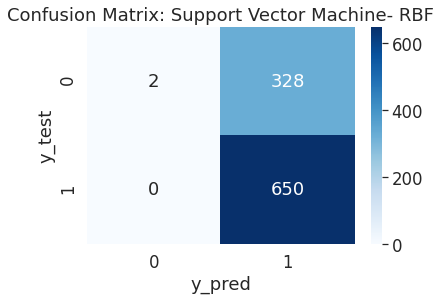

In [ ]:
#Confusion Matrix
cm_svm = confusion_matrix(y_test,svm_ypred)
print(cm_svm)

sns.heatmap(cm_svm,annot=True,cmap='Blues',fmt="d")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: Support Vector Machine- RBF")
plt.show()

***1. Meta parameter selection***

In [ ]:
svmmodel.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
parameters = [
              {'C' : [1.1,1.2,1.5,1.7,1.8,1.9], 
               'kernel' : ['rbf'], 
               'gamma':[1.0,1.1,1.2,1.3,1.4,1.5,1.6]}]
grid_searchh = GridSearchCV(svmmodel, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_searchh.fit(X_train, y_train)
best_accuracy = grid_search.best_score_

In [ ]:
#now finding best parameter using Grid Search CV
from sklearn.model_selection import GridSearchCV
param = {
    'C': [1.3],
    'kernel':[ 'rbf'],
    'gamma' :[1.1]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=10, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.3], 'gamma': [1.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#now let's try with best params
svc = SVC(kernel='rbf',C=10,gamma=1)
#svc = SVC(C=1.3, gamma= 1.1, kernel ='rbf')
svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("Accuracy on training set: {:.4f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.9997
Accuracy on test set: 0.7561


In [ ]:
ygs_pred = svc.predict(X_test)
print(classification_report(y_test,ygs_pred ))

              precision    recall  f1-score   support

         bad       0.93      0.30      0.45       330
        good       0.73      0.99      0.84       650

    accuracy                           0.76       980
   macro avg       0.83      0.64      0.65       980
weighted avg       0.80      0.76      0.71       980



[[ 98 232]
 [  7 643]]


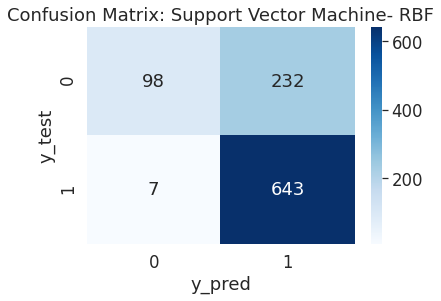

In [ ]:
#Confusion Matrix
gm_svm = confusion_matrix(y_test,ygs_pred)
print(gm_svm)

sns.heatmap(gm_svm,annot=True,cmap='Blues',fmt="d")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Confusion Matrix: Support Vector Machine- RBF")
plt.show()

In [ ]:
scores = cross_val_score(svc, X_test, y_test, cv=5)
print(scores)
print(scores.mean())

[0.67857143 0.68877551 0.68877551 0.68367347 0.70408163]
0.6887755102040817
